In [1]:
from importlib import reload

import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from mandelbrot_matrix import SEED, random_mandelbrot_points

save_files = False

# reload(mandelbrot_matrix)

plt.style.use('seaborn')

re_lim=(-2,1) 
im_lim=(-1.25,1.25)

theta = 1.506793
run_full = False

In [4]:
from sampling_functions import generate_pureRandomSample, generate_latinHyperCube, generate_Orthogonal
from simulation_functions import compare_sampling_functions

test_functions = [generate_pureRandomSample,generate_latinHyperCube, generate_Orthogonal]

n_simulations = 1000
threshold = 1000
n_samples = 144

results = [] 
results_data = []

for sampling_function in test_functions:
    result, data = compare_sampling_functions(sampling_function,
                                              n_simulations=n_simulations,
                                              threshold=threshold,
                                              n_points=n_samples)
    results.append(result)
    results_data.append(data)
    result.explain()

Running simulation for generate_pureRandomSample:


100%|██████████| 1000/1000 [00:21<00:00, 46.30it/s]


Result of simulation for generate_pureRandomSample: 
                 n_sims 	| 	 1000 
                    mean 	| 	 1.5054 
                    std 	| 	 0.25 
                    comp. time	| 	 21 s 
                    conf. int.	| 	 0.0155 
                    conf % 	| 	 95.0 
                  
Running simulation for generate_latinHyperCube:


100%|██████████| 1000/1000 [00:19<00:00, 51.18it/s]


Result of simulation for generate_latinHyperCube: 
                 n_sims 	| 	 1000 
                    mean 	| 	 1.5032 
                    std 	| 	 0.173 
                    comp. time	| 	 19 s 
                    conf. int.	| 	 0.0107 
                    conf % 	| 	 95.0 
                  
Running simulation for generate_Orthogonal:


100%|██████████| 1000/1000 [00:23<00:00, 42.28it/s]

Result of simulation for generate_Orthogonal: 
                 n_sims 	| 	 1000 
                    mean 	| 	 1.5103 
                    std 	| 	 0.09926 
                    comp. time	| 	 23 s 
                    conf. int.	| 	 0.00615 
                    conf % 	| 	 95.0 
                  


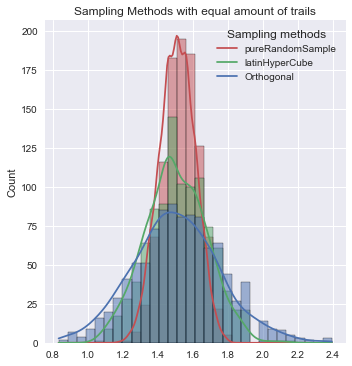

In [34]:
import seaborn as sns

df = pd.DataFrame(np.transpose(results_data), columns=[str(r.funct).removeprefix("generate_") for r in results],)
fig = sns.displot(df,bins=30 ,kde=True, legend=False,)
# fig.set_axis_labels(x_var="area")
plt.legend(labels=[str(r.funct).removeprefix("generate_") for r in results],loc=1, title="Sampling methods", 
           fontsize = 'medium', title_fontsize = "12")
plt.title("Sampling Methods with equal amount of trails")
plt.savefig(f"figures/dist_comp_of_sampling_nsims={n_simulations}", dpi=600)





In [36]:
import json

with open("simulation_data/d_c_of_s_nsims=1000-V1.json", mode="a") as fp:
    json.dump(results, fp)

TypeError: Object of type TestResult is not JSON serializable

# calculating the confidence interval for different sampling functions

In [ ]:
from sampling_functions import generate_pureRandomSample, generate_latinHyperCube, generate_Orthogonal
from simulation_functions import test_sampling_function
test_functions = [generate_pureRandomSample,generate_latinHyperCube, generate_Orthogonal]

samplestep = 100
max_a = 0.001 * theta
threshold = 1000
n_points = 144
results =[]

np.random.seed(SEED) # type: ignore
for sampling_function in test_functions:
    result = test_sampling_function(sampling_function, 
                                    samplestep=samplestep,
                                    max_a=max_a,
                                    threshold=threshold,
                                    n_points=n_points, 
                                    )
    results.append(result)
    result.explain()